In [1]:
import pandas as pd
import numpy as np
import arrow
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn.tree import DecisionTreeRegressor


In [2]:
df = pd.read_csv('USvideos.csv')
df_10 = df[df['category_id'] == 10]

index = int(len(df_10)*0.8)
df_train =df_10[:index]
df_test = df_10[index:]

X_train = df_train[["likes"]].to_numpy()
Y_train = df_train["views"].to_numpy()
X_test = df_test[["likes"]].to_numpy()
Y_test = df_test["views"].to_numpy()

In [3]:
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
Y_pred2 = model2.predict(X_test)
mse2 = mean_squared_error(Y_test, Y_pred2)
r22 = r2_score(Y_test, Y_pred2)
print("MSE2: %.2f" % mse2)
print("R22 Score: %.2f" % r22)

MSE2: 225588291393464.62
R22 Score: 0.65


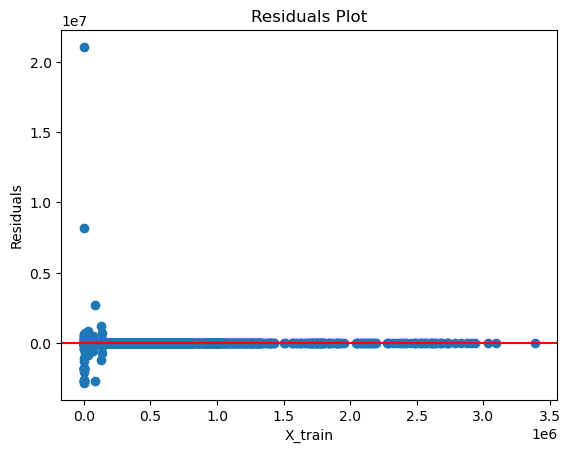

In [5]:
Y_train_pred = model2.predict(X_train)
residuals = Y_train - Y_train_pred
studentized_residuals = residuals / np.sqrt(mean_squared_error(Y_train, Y_train_pred))
outliers = np.abs(studentized_residuals) > 2
plt.scatter(X_train, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('X_train')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [8]:
print("Outliers based on studentized residuals:", np.where(outliers)[0])

outliers_indices = np.where(outliers)[0]


Outliers based on studentized residuals: [ 442  569  586  613 1644 1670 1700 1728 1758 1784 2063 2390 2753 2790
 2831 2861 2894 2927 3382 3680 3819 3832 4152 4188 4364 4447 5057]


In [9]:
cleaned_X = np.delete(X_train, outliers_indices, axis=0)
cleaned_y = np.delete(Y_train, outliers_indices, axis=0)

model2.fit(cleaned_X, cleaned_y)
Y_pred = model2.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("new MSE: %.2f" % mse)
print("new R2 Score: %.2f" % r2)

new MSE: 225585992334121.62
new R2 Score: 0.65
